<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_150Hz_SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [731]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [732]:
df = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_150Hz.csv',sep=';')
df.dropna(inplace=True)
df = df[df['Solidity'] <= 1]
df.columns

Index([' ', 'Label', 'Area', 'Perim.', 'Major', 'Minor', 'Angle', 'Circ.',
       'Feret', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR', 'Round',
       'Solidity', 'Group', 'AR2', 'Equivalent Diameter', 'Circ sqrt'],
      dtype='object')

In [733]:
df_kcluster = df.drop([' ', 'Label','Group'], axis=1)
df_kcluster.head(2)

,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,AR2,Equivalent Diameter,Circ sqrt
0,3962.356,628.458,73.079,69.035,108.770,0.126,107.092,56.0,1102.0,166.608,87.635,1.059,0.945,0.581,0.818315,71.028363,0.355063
1,1944.262,414.578,78.702,31.454,12.769,0.142,115.068,173.0,1222.0,7.431,53.576,2.502,0.400,0.461,0.465603,49.754510,0.377030


In [734]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_kcluster)
df_kcluster_scaled = scaler.transform(df_kcluster)
df_kcluster_scaled = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)

,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,AR2,Equivalent Diameter,Circ sqrt
0,0.088370,0.129369,0.185464,0.400044,0.605206,0.113590,0.206133,0.022004,0.619101,0.933271,0.299187,0.008933,0.944247,0.446499,0.849322,0.279385,0.262852
1,0.043009,0.083441,0.202307,0.171215,0.070468,0.129817,0.223496,0.067976,0.686517,0.029678,0.175481,0.261692,0.297746,0.287979,0.348156,0.187620,0.287069


In [735]:
from sklearn.cluster import SpectralClustering

In [736]:
model = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=367)
model.fit(df_kcluster_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=367)

In [737]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.labels_[model.labels_ == 2] = 1
print('Confussion Matrix:')
print(confusion_matrix(df['Group'],model.labels_))
print('Accuracy:')
print(round(accuracy_score(df['Group'],model.labels_),3))

Confussion Matrix:
[[1130   25]
 [   2  389]]
Accuracy:
0.983


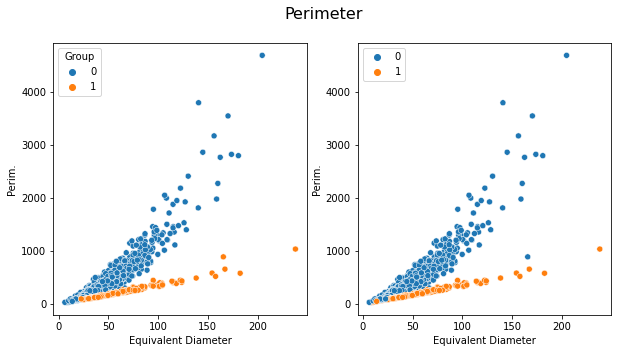

In [738]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Perimeter', fontsize=16)
sns.scatterplot(data=df, y='Perim.',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Perim.',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

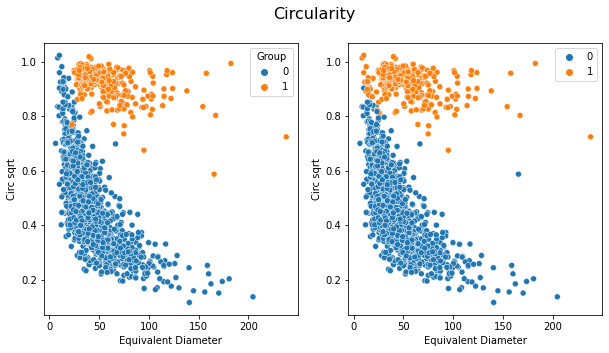

In [739]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Circularity', fontsize=16)
sns.scatterplot(data=df, y='Circ sqrt',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

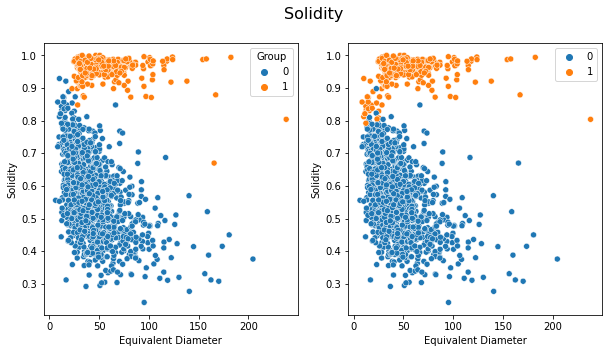

In [740]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Solidity', fontsize=16)
sns.scatterplot(data=df, y='Solidity',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

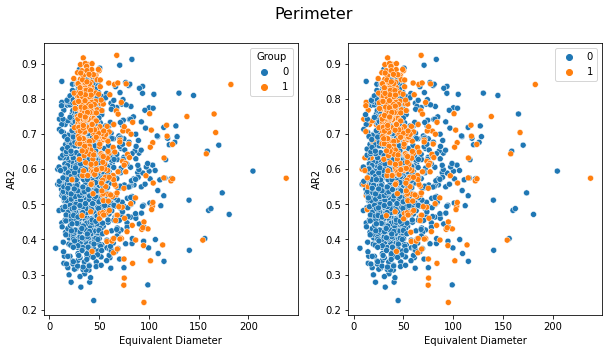

In [741]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Perimeter', fontsize=16)
sns.scatterplot(data=df, y='AR2',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='AR2',x='Equivalent Diameter', hue=model.labels_,ax=ax2)